<br><br>
<font size='6'><b>Artificial Neural Networks (ANN)
</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 55% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 25%>
        By Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 0. Deep Learning Libraries

__Caffe__

<img src="./image_files/Caffe_logo.png" width = 200>

- Platform: Linux, Mac OS, Windows
- Written in: C++
- Interface: Python, MATLAB

<br>
__Theano__
<img src="./image_files/Theano_logo.png" width = 200>

- Platform: Cross-platform
- Written in: Python
- Interface: Python

<br>
__Tensorflow__

<img src="./image_files/Tensorflow_logo.png" width = 250>

- Platform: Linux, Mac OS, Windows
- Written in: C++, Python
- Interface: Python, C/C++, Java, Go, R


# 1. Machine Learning and Deep Learning

__Machine Learning__
- Hand-crafted features
- Depends on expertise
    
__Deep Learning__
- Automatic feature extraction
- Depends on network structure

<img src="./image_files/ML_DL.PNG" width = 700>


# 2. Artificial Neural Networks

__= Multi Layer Perceptrons (MLPs)__

__Transformation__
- Affine (or linear) transformation and nonlinear activation (layer)

$$ f(x) = g\left(\theta^{T}x + b\right) $$

- Nonlinear activation function

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/sigmoid_function.jpg" width = 250>
            $$ g(x) = \frac{1}{1+e^{-x}}$$
        </td>
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/tanh_function.jpg" width = 250>
            <br>
            $$ g(x) = \tanh (x)$$
        </td>
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/relu_function.jpg" width = 250>
            <br>
            $$ g(x) = \max (0, x)$$
        </td>
    </tr>
</table>
<br>
__Deep Network__
 - Apply multiple layers 
$$  f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x))) $$

- $ z = f^{(1)}(x) $ is called a hidden layer

<br>

<img src="./image_files/deep_structure.png" width = 450>

# 3. Training Neural Networks

__Loss Function__

- Measures error between target values and predictions
- More or less the same as those for other parametric models, such as linear models

$$ \min_{\theta} \sum_{i=1}^{m}\ell\left( h_{\theta}\left(x^{(i)}\right),y^{(i)}\right)$$

- Example
    - Cross entropy:
    $$ -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}\log(h_{\theta}\left(x^{(i)}\right)) + (1-y^{(i)})\log(1-h_{\theta}\left(x^{(i)}\right))$$
    - Squared loss:
    $$  \frac{1}{N} \sum_{i=1}^{N} (h_{\theta}\left(x^{(i)}\right) - y^{(i)})^2 $$

__Backpropagation__

- Forward propagation 
    - the initial information propagates up to the hidden units at each layer and finally produces output
- Backpropagation
    - allows the information from the cost to flow backwards through the network in order to compute the gradients

<img src="./image_files/animate_backpropa.gif" width = 450>

__(Stochastic) Gradient Descent__

- Negative gradients points directly downhill of cost function
- We can decrease cost by moving in the direction of the negative gradient ($\alpha$ is a learning rate)

$$ \theta:= \theta - \alpha \nabla_{\theta} \left( h_{\theta} \left(x^{(i)}\right),y^{(i)}\right)$$

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/GradientDescent.png" width = 450>
        </td>
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/GradientDescent_3d.png" width = 450>
        </td>
    </tr>
</table>





# 4. ANN with TensorFlow

- MNIST (Mixed National Institute of Standards and Technology database) database
    - Handwritten digit database
    - $28 \times 28$ gray scaled image
    - Flattened array into a vector of $28 \times 28 = 784$
    
<img src="./image_files/mnist_digits.png" width = 450>

<img src="./image_files/MNIST-Matrix.png" width = 450>

<br>
<img src="./image_files/MNIST_neuralnet_image.png" width = 500>
<br>

In [1]:
%%html
<center><iframe src="https://www.youtube.com/embed/z0bynQjEpII?start=2088&end=3137" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

## 4.1. Import Library

In [2]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 4.2. Load MNIST Data

- Download MNIST data here: [mnist.zip](data_files/mnist.zip) 

In [3]:
from six.moves import cPickle

mnist = cPickle.load(open('./data_files/MNIST.pkl', 'rb'))
trainimgs   = mnist.train.images
trainlabels = mnist.train.labels
testimgs    = mnist.test.images
testlabels  = mnist.test.labels
n_train     = trainimgs.shape[0]
n_test      = testimgs.shape[0]
print ("Packages loaded")
print ("The number of trainimgs : {}, shape : {}".format(n_train, trainimgs.shape))
print ("The number of testimgs : {}, shape : {}".format(n_test, testimgs.shape))

Packages loaded
The number of trainimgs : 55000, shape : (55000, 784)
The number of testimgs : 10000, shape : (10000, 784)


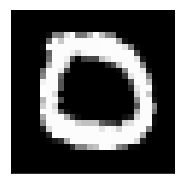

In [4]:
plt.figure(figsize=(5, 3))
plt.imshow(trainimgs[4, :].reshape(28, 28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
print ('Train labels : {}'.format(trainlabels[4, :]))

Train labels : [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## 4.3. Build a Model

__ First, the layer performs several matrix multiplication to produce a set of linear activations __

<img src="./image_files/linear_sum2.png" width = 320>

$$y_j = \left(\sum\limits_i \omega_{ij}x_i\right) + b_j$$

$$\mathcal{y} = \mathcal{w}^T \mathcal{x} + \mathcal{b}$$

```python
layer1 = tf.matmul(x, weights['h1_w']) + biases['h1_b']
```

__ Second, each linear activation is running through a nonlinear activation function __

<img src="./image_files/ReLU.png" width = 500>

```python
layer1 = tf.nn.relu(layer1)
```

__Third, predict values with affine transformation__

<img src="./image_files/classification.png" width = 450>

```python
output_layer = tf.matmul(layer1, weights['output_w']) + biases['output_b']
```

## 4.4. Define an ANN Shape

- Input size
- Hidden layer size
- The number of classes

<img src="./image_files/MNIST_neuralnet_image.png" width = 500>
<br>

In [6]:
n_input = 28*28
n_hidden = 100
n_classes = 10

## 4.5. Define Weights, Biases and Network
- Define parameters based on predefined layer size
- Initialize with normal distribution with $\mu = 0$ and $\sigma = 0.1$

In [7]:
weights = {
    'h1_w' : tf.Variable(tf.random_normal([n_input, n_hidden], stddev = 0.1)),
    'output_w' : tf.Variable(tf.random_normal([n_hidden, n_classes], stddev = 0.1)),
}
biases = {
    'h1_b' : tf.Variable(tf.random_normal([n_hidden], stddev = 0.1)),
    'output_b' : tf.Variable(tf.random_normal([n_classes], stddev = 0.1)),
}

In [8]:
# Define Network
def net(x, weights, biases):
    # first hidden layer
    layer1 = tf.matmul(x, weights['h1_w']) + biases['h1_b']
    # non linear activate function
    layer1 = tf.nn.relu(layer1)
    
    # Output layer with linear activation
    output_layer = tf.matmul(layer1, weights['output_w']) + biases['output_b']
    return output_layer

## 4.6. Define Cost, Initializer and Optimizer

__Loss__
- Classification: Cross entropy
    - Equivalent to apply logistic regression
$$ -\frac{1}{N}\sum_{i=1}^{N = 50}y^{(i)}\log(h_{\theta}\left(x^{(i)}\right)) + (1-y^{(i)})\log(1-h_{\theta}\left(x^{(i)}\right)) $$

__Initializer__
- Initialize all the empty variables
    
__Optimizer__
- AdamOptimizer: The most popular optimizer

In [9]:
# Define Cost
learning_rate = 0.0001
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

pred = net(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

## 4.7. Summary of Model

<br>
<img src="./image_files/cnn_summary of model.png" width = 500>
<br>

## 4.8. Define Configuration
- Define parameters for training ANN
     - Batch size: batch size for stochastic gradient descent
     - The number of iteration: the number of training steps
     - Flag: check cost for every flag iteration

In [10]:
batch_size = 50
n_iter = 2500
flag = 250

## 4.9. Optimization

In [11]:
# Run initialize
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(n_iter):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict={x: batch_x,  y: batch_y}) 
    
    if epoch % flag == 0:
        c = sess.run(cost, feed_dict={x: batch_x,  y: batch_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 2.4451746940612793
Iter : 250
Cost : 1.2966125011444092
Iter : 500
Cost : 0.8489342331886292
Iter : 750
Cost : 0.6071790456771851
Iter : 1000
Cost : 0.4588173031806946
Iter : 1250
Cost : 0.3541680574417114
Iter : 1500
Cost : 0.5749586224555969
Iter : 1750
Cost : 0.4190523624420166
Iter : 2000
Cost : 0.2946029305458069
Iter : 2250
Cost : 0.2077590823173523


## 4.10. Test

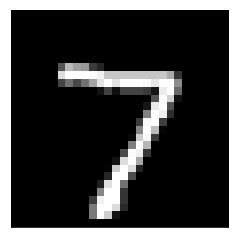

Prediction : 7
Probability : [ 0.    0.    0.    0.    0.    0.    0.    0.99  0.    0.  ]


In [12]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x})
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))

In [13]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>